![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **HOW TO PLOT A HEATMAP OF RETURNS FOR DIFFERENT HOLDING PERIODS**

## **Plot a heatmap for investment returns**

<font size="3"> In a previous <a href="https://quant-trading.co/how-to-plot-a-heatmap-of-returns-from-multiple-assets/" target="_blank">notebook</a>, we showed how to plot a heatmap of returns to compare different assets.  Now we will show how to make a different heatmap, one that shows the returns for investments that start on a particular date and that are held for "x" number of years. Remember that a heat map is a way to represent data points in a data set in a visual manner. All heat maps share one thing in common -- they use different colors or different shades of the same color to represent different values and to communicate the relationships that may exist between the variables plotted on the x-axis and y-axis. Usually, a darker color or shade represents a higher or greater quantity of the value being represented in the heat map. So, now we will show how to plot a heatmap of returns for different investment periods. 
<br><br>

In [1]:
import warnings
warnings.filterwarnings('ignore')


import os
import datetime
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
import matplotlib.ticker as ticker
from matplotlib.ticker import FormatStrFormatter
import yfinance as yf  #Yahoo Finance
from  matplotlib.colors import LinearSegmentedColormap

## **Define some parameters for the calculations and the charts**

<font size="3"> We will define a set of parameters: a) The dates we would like to work with, b) The assets we will track the prices to get the returns, c) The names we will give to our asset's, in case people are not familiar with the stock's symbol
<br><br>

In [2]:
Ticker = '^SPX'
my_ticker = yf.Ticker(Ticker)

#DATES
start_date = datetime.datetime(1994, 12, 31)
end_date = datetime.datetime(2024, 12, 31)

prices_hist = my_ticker.history(start=start_date,end=end_date)

## **Calculating returns for holding periods**

<font size="3"> We need to use the resampling function as we explained in this <a href="https://quant-trading.co/mean-and-median-return-calculations-using-python/" target="_blank">notebook</a>. TIn the following script, we show how to calculate cumulative returns for the entire DataFrame period and resample it. This should help us calculate returns for different holding periods
<br><br>

In [3]:
prices_hist['Dividends'].iloc[-1]=0
prices_hist['perc_Dividends']=prices_hist['Dividends']/prices_hist['Close']
prices_hist['ret'] = prices_hist['Close']/ prices_hist['Close'].shift(1)-1+prices_hist['perc_Dividends']
prices_hist['cum_ret']=(1 + prices_hist['ret']).cumprod()
prices_hist['AdjClose']= 100*prices_hist['cum_ret']      #calculate an adjusted price to include dividends
prices_hist['AdjClose'].iloc[0]=100   
prices_hist_anual = prices_hist.resample('Y')          #resample the DataFrame to calculate yearly returns
prices_hist_anual = prices_hist_anual.apply(lambda x : x.iloc[-1])

prices_hist_anual.reset_index(inplace=True)
prices_hist_anual['Date'] = pd.to_datetime(prices_hist_anual['Date'], utc=True)
prices_hist_anual['year'] = prices_hist_anual['Date'].dt.year
years_list = prices_hist_anual['year'].unique()

prices_hist_anual.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,perc_Dividends,ret,cum_ret,AdjClose,year
0,1995-12-31 05:00:00+00:00,614.119995,615.929993,612.359985,615.929993,321250000,0.0,0.0,0.0,0.002947,1.341574,134.157394,1995
1,1996-12-31 05:00:00+00:00,753.849976,753.950012,740.739990,740.739990,399760000,0.0,0.0,0.0,-0.017391,1.613426,161.342601,1996
2,1997-12-31 05:00:00+00:00,970.840027,975.020020,967.409973,970.429993,467280000,0.0,0.0,0.0,-0.000422,2.113720,211.372008,1997
3,1998-12-31 05:00:00+00:00,1231.930054,1237.180054,1224.959961,1229.229980,719200000,0.0,0.0,0.0,-0.002192,2.677419,267.741940,1998
4,1999-12-31 05:00:00+00:00,1464.469971,1472.420044,1458.189941,1469.250000,374050000,0.0,0.0,0.0,0.003264,3.200214,320.021356,1999


## **Create a dictionary of DataFrames to store the information from the stocks**

   
<font size="3"> An easy way to store the information from a set of different stocks is using a dictionary of DataFrames. You will have the starting year of the investment as the Dictionary's key. <font size="3"> In a previous <a href="https://quant-trading.co/how-to-plot-cumulative-returns-for-multiple-assets/" target="_blank">notebook</a>, we showed how to do that step by step. We also need to loop from 1 to the number of years that we plan to hold the investment to calculate the annualized return. This is shown in the script below:     
<br><br>

In [4]:
DataFrameDict = {elem : pd.DataFrame() for elem in years_list}

for key in DataFrameDict.keys():    
    DataFrameDict[key] = prices_hist_anual[:][prices_hist_anual['year'] >= key]
    DataFrameDict[key]['ret2'] = np.nan
    DataFrameDict[key]['holding_period'] = np.nan    
    for i in range(1,DataFrameDict[key].shape[0]):
        DataFrameDict[key]['ret2'].iloc[i] = (DataFrameDict[key]['AdjClose'].iloc[i]/ DataFrameDict[key]['AdjClose'].iloc[0])**(1/(i))-1
        DataFrameDict[key]['holding_period'].iloc[i] = i

In [5]:
#Here we get an example of the DataFrame for 1995
DataFrameDict[1995].head(10)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,perc_Dividends,ret,cum_ret,AdjClose,year,ret2,holding_period
0,1995-12-31 05:00:00+00:00,614.119995,615.929993,612.359985,615.929993,321250000,0.0,0.0,0.0,0.002947,1.341574,134.157394,1995,NaN,NaN
1,1996-12-31 05:00:00+00:00,753.849976,753.950012,740.739990,740.739990,399760000,0.0,0.0,0.0,-0.017391,1.613426,161.342601,1996,0.202637,1.0
2,1997-12-31 05:00:00+00:00,970.840027,975.020020,967.409973,970.429993,467280000,0.0,0.0,0.0,-0.000422,2.113720,211.372008,1997,0.255210,2.0
3,1998-12-31 05:00:00+00:00,1231.930054,1237.180054,1224.959961,1229.229980,719200000,0.0,0.0,0.0,-0.002192,2.677419,267.741940,1998,0.259024,3.0
4,1999-12-31 05:00:00+00:00,1464.469971,1472.420044,1458.189941,1469.250000,374050000,0.0,0.0,0.0,0.003264,3.200214,320.021356,1999,0.242771,4.0
5,2000-12-31 05:00:00+00:00,1334.219971,1340.099976,1317.510010,1320.280029,1035500000,0.0,0.0,0.0,-0.010448,2.875738,287.573800,2000,0.164735,5.0
6,2001-12-31 05:00:00+00:00,1161.020020,1161.160034,1148.040039,1148.079956,943600000,0.0,0.0,0.0,-0.011145,2.500664,250.066431,2001,0.109362,6.0
7,2002-12-31 05:00:00+00:00,879.390015,881.929993,869.450012,879.820007,1088500000,0.0,0.0,0.0,0.000489,1.916360,191.635999,2002,0.052260,7.0
8,2003-12-31 05:00:00+00:00,1109.640015,1112.560059,1106.209961,1111.920044,1027500000,0.0,0.0,0.0,0.002055,2.421903,242.190342,2003,0.076633,8.0
9,2004-12-31 05:00:00+00:00,1213.550049,1217.329956,1211.650024,1211.920044,786900000,0.0,0.0,0.0,-0.001343,2.639716,263.971615,2004,0.078103,9.0


## **Rearrange the DataFrame**

   
<font size="3"> As you can see, the Dictionary of DataFrames contains a lot of information, but we don't need all that information and we need the data in a different arrangement. That's why we can rearrange all that information using a a few steps. Below we show, how to merge the yearly returns for each ticker into a single DataFrame. 
<br><br>

In [6]:
#Example of the DataFrame for 2022 using just 2 columns
DataFrameDict[2022][['holding_period','ret2']]

,holding_period,ret2
27,NaN,NaN
28,1.0,0.242305
29,2.0,0.198944


In [7]:
#Example of the DataFrame for 2023 using just 2 columns
DataFrameDict[2023][['holding_period','ret2']]

,holding_period,ret2
28,NaN,NaN
29,1.0,0.157096


In [8]:
#Merge the 2 DataFrames
xxx = pd.merge(DataFrameDict[2022][['holding_period','ret2']],DataFrameDict[2023][['holding_period','ret2']], left_on='holding_period',right_on='holding_period', how='left')
xxx

,holding_period,ret2_x,ret2_y
0,NaN,NaN,NaN
1,1.0,0.242305,0.157096
2,2.0,0.198944,NaN


In [9]:
#Loop to merge all DataFrames in the Dictionary
df_all = DataFrameDict[years_list[0]][['holding_period','ret2']]

for i in range(1,len(years_list)):
    df_all = pd.merge(df_all,DataFrameDict[years_list[i]][['holding_period','ret2']], left_on='holding_period',right_on='holding_period', how='left')

df_all.head(10)

,holding_period,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,...,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.202637,0.310082,0.266686,0.195260,-0.101392,-0.130427,-0.233660,0.263804,0.089935,...,0.095350,0.194200,-0.062373,0.288781,0.162589,0.268927,-0.194428,0.242305,0.157096,NaN
2,2.0,0.255210,0.288201,0.230455,0.036374,-0.116029,-0.183674,-0.015874,0.173654,0.059549,...,0.143708,0.058166,0.099271,0.224060,0.214595,0.011045,0.000383,0.198944,NaN,NaN
3,3.0,0.259024,0.256444,0.108070,-0.022508,-0.157119,-0.055644,0.018202,0.123675,0.084505,...,0.070418,0.130044,0.119984,0.238837,0.059227,0.082903,0.050108,NaN,NaN,NaN
4,4.0,0.242771,0.155447,0.042922,-0.080207,-0.067295,-0.021182,0.021141,0.126792,0.071988,...,0.121269,0.138094,0.155495,0.112466,0.102298,0.100993,NaN,NaN,NaN,NaN
5,5.0,0.164735,0.091594,-0.019413,-0.019860,-0.037777,-0.011151,0.043180,0.107867,-0.040717,...,0.129414,0.163134,0.075066,0.137300,0.113046,NaN,NaN,NaN,NaN,NaN
6,6.0,0.109362,0.029093,0.022943,-0.002361,-0.026797,0.012007,0.041862,0.004390,0.000476,...,0.151552,0.094063,0.101288,0.140575,NaN,NaN,NaN,NaN,NaN,NaN
7,7.0,0.052260,0.059744,0.032255,0.002201,-0.005029,0.015302,-0.033683,0.034434,0.017748,...,0.094247,0.114105,0.109092,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,8.0,0.076633,0.063472,0.031974,0.018045,-0.000076,-0.046342,-0.003637,0.045672,0.015509,...,0.111743,0.119390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,9.0,0.078103,0.059701,0.043065,0.019947,-0.052621,-0.018592,0.010179,0.040492,0.028044,...,0.116693,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## **Adjust the DataFrame**

   
<font size="3"> Here we need to understand the current structure of the DataFrame and adjust some features to be able to plot the data into a Heatmap
<br><br>

In [10]:
df_all[df_all.columns].head()

,holding_period,ret2_x,ret2_x,ret2_x,ret2_x,ret2_x,ret2_x,ret2_x,ret2_x,ret2_x,...,ret2_y,ret2_y,ret2_y,ret2_y,ret2_y,ret2_y,ret2_y,ret2_y,ret2_y,ret2_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.202637,0.266686,-0.101392,-0.233660,0.089935,0.136194,-0.384858,0.127827,0.134057,...,0.035296,0.234542,-0.000032,0.296012,-0.007266,0.194200,0.288781,0.268927,0.242305,NaN
2,2.0,0.255210,0.230455,-0.116029,-0.015874,0.059549,0.084572,-0.128554,0.061975,0.212333,...,-0.201969,0.179979,0.064904,0.201514,0.042781,0.058166,0.224060,0.011045,0.198944,NaN
3,3.0,0.259024,0.108070,-0.157119,0.018202,0.084505,-0.102232,-0.050326,0.085478,0.178594,...,-0.077042,0.116636,0.136955,0.127449,0.090990,0.130044,0.238837,0.082903,NaN,NaN
4,4.0,0.242771,0.042922,-0.067295,0.021141,0.071988,-0.027814,-0.037995,0.134666,0.129097,...,-0.029608,0.120966,0.131149,0.119337,0.050445,0.138094,0.112466,0.100993,NaN,NaN


In [11]:
#Drop the column holding_period
df_all.drop(['holding_period'], axis='columns', inplace=True)
df_all.head()

,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,...,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.202637,0.310082,0.266686,0.195260,-0.101392,-0.130427,-0.233660,0.263804,0.089935,0.030010,...,0.095350,0.194200,-0.062373,0.288781,0.162589,0.268927,-0.194428,0.242305,0.157096,NaN
2,0.255210,0.288201,0.230455,0.036374,-0.116029,-0.183674,-0.015874,0.173654,0.059549,0.081800,...,0.143708,0.058166,0.099271,0.224060,0.214595,0.011045,0.000383,0.198944,NaN,NaN
3,0.259024,0.256444,0.108070,-0.022508,-0.157119,-0.055644,0.018202,0.123675,0.084505,0.066071,...,0.070418,0.130044,0.119984,0.238837,0.059227,0.082903,0.050108,NaN,NaN,NaN
4,0.242771,0.155447,0.042922,-0.080207,-0.067295,-0.021182,0.021141,0.126792,0.071988,-0.070855,...,0.121269,0.138094,0.155495,0.112466,0.102298,0.100993,NaN,NaN,NaN,NaN


In [12]:
#Drop the first row since it doesn't contain information
df_all.drop(0, inplace=True)
df_all.head()

,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,...,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y,ret2_x,ret2_y
1,0.202637,0.310082,0.266686,0.195260,-0.101392,-0.130427,-0.233660,0.263804,0.089935,0.030010,...,0.095350,0.194200,-0.062373,0.288781,0.162589,0.268927,-0.194428,0.242305,0.157096,NaN
2,0.255210,0.288201,0.230455,0.036374,-0.116029,-0.183674,-0.015874,0.173654,0.059549,0.081800,...,0.143708,0.058166,0.099271,0.224060,0.214595,0.011045,0.000383,0.198944,NaN,NaN
3,0.259024,0.256444,0.108070,-0.022508,-0.157119,-0.055644,0.018202,0.123675,0.084505,0.066071,...,0.070418,0.130044,0.119984,0.238837,0.059227,0.082903,0.050108,NaN,NaN,NaN
4,0.242771,0.155447,0.042922,-0.080207,-0.067295,-0.021182,0.021141,0.126792,0.071988,-0.070855,...,0.121269,0.138094,0.155495,0.112466,0.102298,0.100993,NaN,NaN,NaN,NaN
5,0.164735,0.091594,-0.019413,-0.019860,-0.037777,-0.011151,0.043180,0.107867,-0.040717,-0.016514,...,0.129414,0.163134,0.075066,0.137300,0.113046,NaN,NaN,NaN,NaN,NaN


In [13]:
#Rename the column names
df_all.columns = [years_list]
df_all.head()

,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
1,0.202637,0.310082,0.266686,0.195260,-0.101392,-0.130427,-0.233660,0.263804,0.089935,0.030010,...,0.095350,0.194200,-0.062373,0.288781,0.162589,0.268927,-0.194428,0.242305,0.157096,NaN
2,0.255210,0.288201,0.230455,0.036374,-0.116029,-0.183674,-0.015874,0.173654,0.059549,0.081800,...,0.143708,0.058166,0.099271,0.224060,0.214595,0.011045,0.000383,0.198944,NaN,NaN
3,0.259024,0.256444,0.108070,-0.022508,-0.157119,-0.055644,0.018202,0.123675,0.084505,0.066071,...,0.070418,0.130044,0.119984,0.238837,0.059227,0.082903,0.050108,NaN,NaN,NaN
4,0.242771,0.155447,0.042922,-0.080207,-0.067295,-0.021182,0.021141,0.126792,0.071988,-0.070855,...,0.121269,0.138094,0.155495,0.112466,0.102298,0.100993,NaN,NaN,NaN,NaN
5,0.164735,0.091594,-0.019413,-0.019860,-0.037777,-0.011151,0.043180,0.107867,-0.040717,-0.016514,...,0.129414,0.163134,0.075066,0.137300,0.113046,NaN,NaN,NaN,NaN,NaN


In [14]:
#Create a list of the holding periods to display in the Heatmap
holding_periods = np.linspace(1,df_all.shape[0],df_all.shape[0])
holding_periods = holding_periods.astype(int) #they should be integers for better display
holding_periods

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

## **Create the heatmap chart**

   
<font size="3"> One of the parameters we need to use is a cmap. For that, we use the LinearSegmentedColormap.from_list method. You must pass a list of RGB tuples that define the mixture of colors from 0 to 1. <br><br>
    
<font size="3"> The other important thing for the plot, is the sns.heatmap function. In this case, we are using the library Seaborn and the function heatmap. Here is an explanation of the parameters:<br><br>
    
<font size="3"> The first 2 parameters are vmin and vmax, where we should write the minimum and maximum values for the returns. From those numbers upwards or downwards the color will be at it maximum intensity. In this case we put -30% and +30%. If we have a return of 100%, the color will be the same as if we have 30%. 
<br><br>
    
<font size="3"> The next parameter is the data. In this dase we are using all the data.
<br><br>

<font size="3"> Then we have the annot parameter. If True, python writes the data value in each cell. In this case we get the returns for each year.
<br><br>

<font size="3"> Then we have the fmt parameter. This is a string formatting code. In this case we use 2.0% to get 2 digits percentual returns without decimals.
<br><br>
    
<font size="3"> The other parameters refer to the cmap we will use and also to the size of the annotations, if we plot a square around each data and the linewidth among others.
<br><br>

Text(1, 30.0, 'www.quant-trading.co')

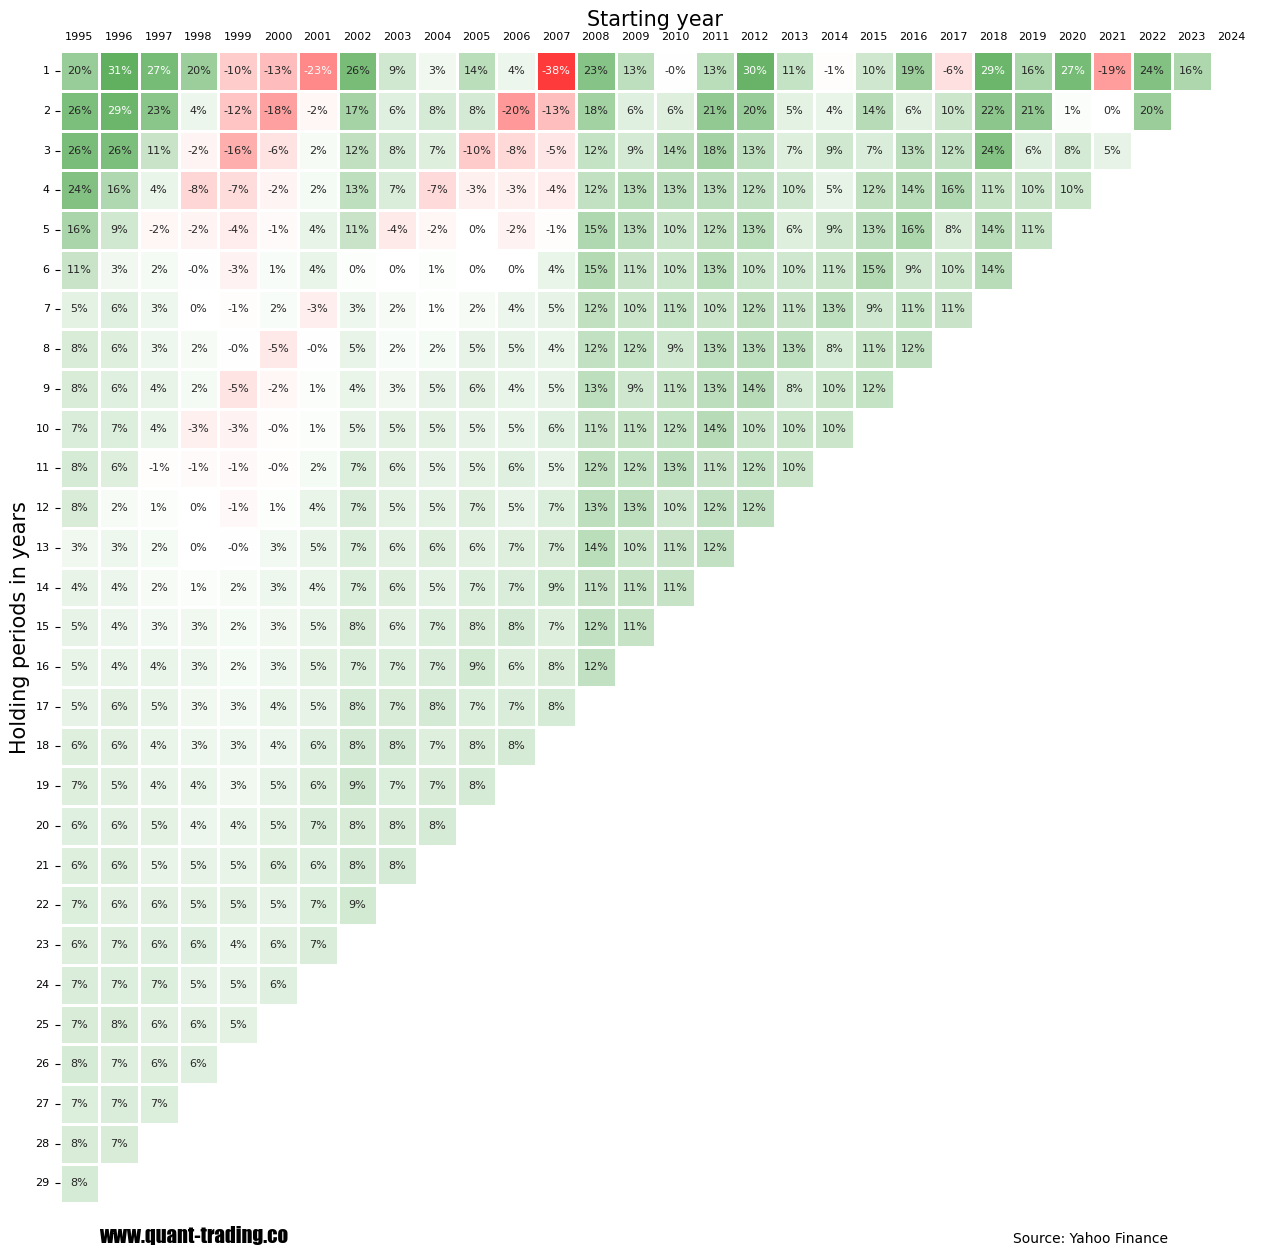

In [15]:
cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)   #you can define your own colors

fig = plt.figure()
ax = fig.add_subplot(1,1,1)
sns.heatmap(vmin=-0.5,vmax=0.5,data = df_all, annot = True, fmt='2.0%',cmap = cmap,annot_kws={'size':8},cbar=False, square=True,linewidth=0.75,yticklabels= holding_periods)
plt.subplots_adjust(bottom=0.1, right=3.0, top=2.5)
ax.set_facecolor('white') 

ax.xaxis.set_label_position('top')
plt.xlabel('Starting year', fontsize = 15) 
plt.ylabel('Holding periods in years', fontsize = 15) 

plt.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = False, labeltop=True)

plt.text(len(years_list)*0.8, len(years_list)*1.0,'Source: Yahoo Finance' , color='black', fontsize=10)
plt.text(1, len(years_list)*1.0,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')

If this content is helpful and you want to make a donation please click on the button

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)